\begin{align}J(w) = \frac 1n \sum_{i=1}^{n} \left( y_i - wx_i \right)^2 \rightarrow \min\end{align}

Эквивалентная задача
\begin{align}L(w) = \sum_{i=1}^{n} \left( y_i - wx_i \right)^2\end{align}

L2-регуляризация
\begin{align}L(w) = \sum_{i=1}^{n} \left( y_i - wx_i \right)^2 + \lambda\sum_{j=0}^{d}w_j^2\end{align}
\begin{align}L(w) = {\left\lVert y - Xw \right\rVert}^2 + \lambda{\left\lVert w \right\rVert}_2^2\end{align}

Градиент:

\begin{align}\nabla L_w = -2X^T(y-Xw) + 2\lambda w\end{align}

Приравниваем градиент нулю:
\begin{align}
   0 &= -2X^T(y-Xw) + 2\lambda w \\
   &= X^T(y-Xw) - \lambda w    \\
   &= X^Ty - X^TXw - \lambda w \\
   &= X^Ty - (X^TX + \lambda I_d) w
   \end{align}

Выражаем $w$:

\begin{align}
   (X^TX + \lambda I_d) w &= X^Ty    \\
   w &= (X^TX + \lambda I_d)^{-1}X^Ty
   \end{align}

L1-регуляризация
\begin{align}L(w) = \sum_{i=1}^{n} \left( y^i - wx^i \right)^2 + \lambda\sum_{j=0}^{d}\left|w_j\right|\end{align}

\begin{align}L(w) = {\left\lVert y - Xw \right\rVert}^2 + \lambda{\left\lVert w \right\rVert}_1\end{align}

Градиент:

\begin{align}\nabla L_w = -2X^T(y-Xw) + \lambda sign (w)\end{align}

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("housing.csv")
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column96,Column97,Column98,Column99,Column100,Column101,Column102,Column103,Column104,Y
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868,36.2


<AxesSubplot: >

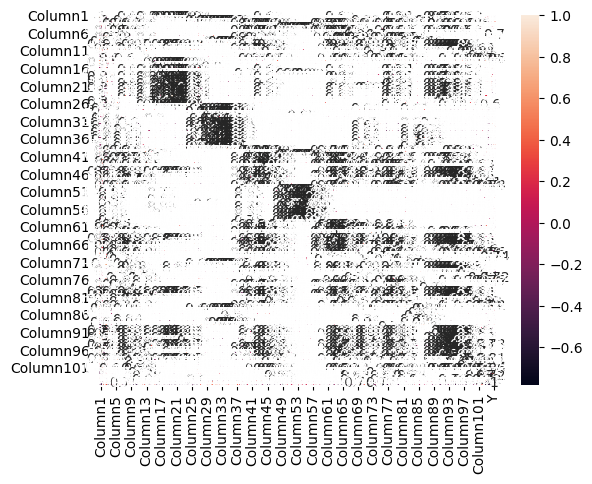

In [ ]:
sns.heatmap(data.corr(), annot = True)

In [ ]:
class MultipleRegression(object):
    def __init__(self):
        self.a = np.zeros(1)
        self.intercept = True
    def predict(self, x):
        return x @ self.a
    def MSE(self, x, Y):
        return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
    def MAE(self, x, Y):
        return abs((Y.to_numpy() - self.predict(x).to_numpy())).mean()
    def MAPE(self, x, Y):
        return abs((Y.to_numpy() - self.predict(x).to_numpy())/Y).mean().to_real()
    def coefs(self):
        return self.a
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000, intercept = True):
        self.intercept = intercept
        self.x = x.copy()
        self.Y = Y.copy()
        if intercept:
            self.x.insert(0, "intercept", np.ones((self.x.shape[0],1)), allow_duplicates=True)
        m = len(self.x)
        self.a = np.zeros(self.x.shape[1]).reshape(self.x.shape[1], 1)
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a = -2*self.x.T@(self.Y.to_numpy() -self.predict(self.x).to_numpy())/m
            self.a -= alpha*dT_a
            new_error = self.MSE(self.x, self.Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [ ]:
def train_test_split_(x, y, test_size, random_seed = 0):
    np.random.seed(random_seed)
    num_train = int(len(x)*(1 - test_size))
    dataset = pd.concat([x, y], axis = 1)
    indices = np.array(dataset.index)
    np.random.shuffle(indices)

    train_dataset = pd.DataFrame([dataset.loc[i, :] for i in indices[:num_train]])
    test_dataset = pd.DataFrame([dataset.loc[i, :] for i in indices[num_train:]])
    x_train = train_dataset.iloc[:, :-1]
    y_train = pd.DataFrame(train_dataset.iloc[:, -1].to_numpy().reshape(x_train.shape[0],1))
    x_test = test_dataset.iloc[:, :-1]
    y_test = pd.DataFrame(test_dataset.iloc[:, -1].to_numpy().reshape(x_test.shape[0],1))
    return x_train, y_train, x_test, y_test

In [ ]:
dataset = data.copy()
Y = dataset['Y']
x = dataset.drop('Y', axis = 1)
x_train, y_train, x_test, y_test = train_test_split_(x, Y, 0.2, 123)
display(x_test)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column95,Column96,Column97,Column98,Column99,Column100,Column101,Column102,Column103,Column104
139,0.006049,0.000,0.785557,0.0,0.491770,0.496264,0.978373,0.049023,0.130435,0.477099,...,0.227624,0.436495,0.477099,0.220250,0.837030,0.914894,0.422356,1.000000,0.461645,0.213116
67,0.000580,0.125,0.205645,0.0,0.049383,0.443955,0.190525,0.488174,0.130435,0.301527,...,0.090918,0.202087,0.301002,0.053000,0.449185,0.669047,0.117805,0.996523,0.175467,0.030896
3,0.000293,0.000,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
342,0.000210,0.000,0.052419,0.0,0.273663,0.570799,0.584964,0.467159,0.000000,0.448473,...,0.201128,0.157443,0.440625,0.085636,0.123246,0.344920,0.067035,0.965307,0.187608,0.036462
56,0.000160,0.850,0.010264,0.0,0.051440,0.540717,0.337796,0.732752,0.043478,0.240458,...,0.057820,0.120229,0.240458,0.026806,0.250000,0.500000,0.055740,1.000000,0.111479,0.012428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.000849,0.000,0.089076,0.0,0.123457,0.816057,0.350154,0.215115,0.043478,0.169847,...,0.028848,0.097572,0.168404,0.008624,0.330014,0.569586,0.029167,0.983077,0.050341,0.002578
476,0.054682,0.000,0.646628,0.0,0.471193,0.560069,0.934089,0.106912,1.000000,0.914122,...,0.835619,0.739077,0.912532,0.427549,0.653689,0.807104,0.378153,0.996523,0.466901,0.218758
322,0.003876,0.000,0.253666,0.0,0.222222,0.475187,0.484037,0.326592,0.173913,0.190840,...,0.036420,0.142115,0.190840,0.031438,0.554550,0.744681,0.122675,1.000000,0.164735,0.027138
382,0.103189,0.000,0.646628,0.0,0.648148,0.378425,1.000000,0.040993,1.000000,0.914122,...,0.835619,0.739077,0.914122,0.551652,0.653689,0.808511,0.487917,1.000000,0.603477,0.364184


In [ ]:
regr = MultipleRegression()
steps, errors = regr.fit(x_train, y_train, intercept = True, alpha = 0.01, epsylon = 0.00001, max_steps = 10000)

,0
intercept,12.587005
Column1,-1.740037
Column2,-0.177503
Column3,1.896160
Column4,-0.007299
...,...
Column100,-2.954749
Column101,-1.429141
Column102,2.103476
Column103,-7.851093


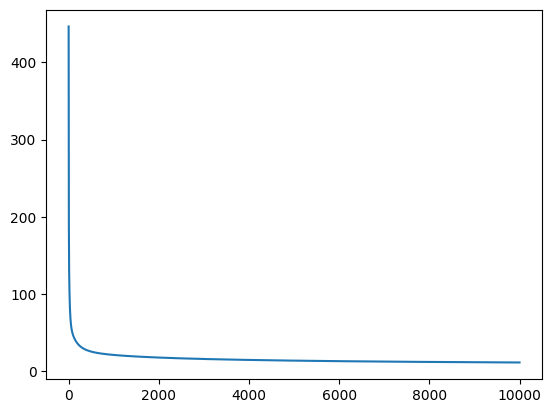

In [ ]:
display(regr.coefs())
plt.plot(steps, errors)

In [ ]:
x_i = x_train.copy()
x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
regr.MSE(x_i, y_train)

11.4500311828102

In [ ]:
x_i = x_test.copy()
x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
regr.MSE(x_i, y_test)

19.885089331287155

<b>Задание.</b>
Метрика на тестовой выборке в два раза хуже, чем на обучающей. Это - переобучение.

Необходимо модифицировать класс MultipleRegression, добавив возможность регуляризации L1, L2 и ElasticNet. Подобрать параметры регуляризации, чтобы побороть переобучение.

Бонусное задание: реализовать класс регуляризации для логистической регрессии и улучшить качество прогноза для класса риска страхователей.

In [ ]:
class MultipleRegressionReg(object):
    def __init__(self):
        self.a = np.zeros(1)
        self.intercept = True
    def predict(self, x):
        return x @ self.a
    def MSE(self, x, Y):
        return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
    def MAE(self, x, Y):
        return abs((Y.to_numpy() - self.predict(x).to_numpy())).mean()
    def MAPE(self, x, Y):
        return abs((Y.to_numpy() - self.predict(x).to_numpy())/Y).mean().to_real()
    def coefs(self):
        return self.a
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000, intercept = True, reg = "No", lam = 0, rho = 0):
        self.intercept = intercept
        self.x = x.copy()
        self.Y = Y.copy()
        if intercept:
            self.x.insert(0, "intercept", np.ones((self.x.shape[0],1)), allow_duplicates=True)
        m = len(self.x)
        self.a = np.zeros(self.x.shape[1]).reshape(self.x.shape[1], 1)
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a = -2*self.x.T@(self.Y.to_numpy() -self.predict(self.x).to_numpy())/m
            if reg == "L1":
                dT_a += lam*(np.sign(self.a))
            elif reg == "L2":
                dT_a += 2*lam*((self.a))
            elif reg == "ElasticNet":
                dT_a += rho*lam*(np.sign(self.a)) + 2*(1-rho)*lam*((self.a))

            self.a -= alpha*dT_a
            new_error = self.MSE(self.x, self.Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216

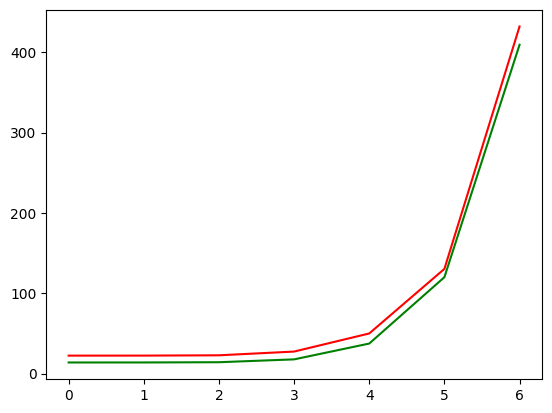

In [ ]:
train_scores, test_scores = [], []
reg_regr = MultipleRegressionReg()
for l in np.logspace(-5, 10, 15):
    steps, errors = reg_regr.fit(x_train, y_train, intercept = True, alpha = 0.01, epsylon = 0.00001, max_steps = 5000, reg = "ElasticNet", lam = l, rho = 0.1)
    x_i = x_train.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    train_scores.append(reg_regr.MSE(x_i, y_train))
    x_i = x_test.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    test_scores.append(reg_regr.MSE(x_i, y_test))
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r')


C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216

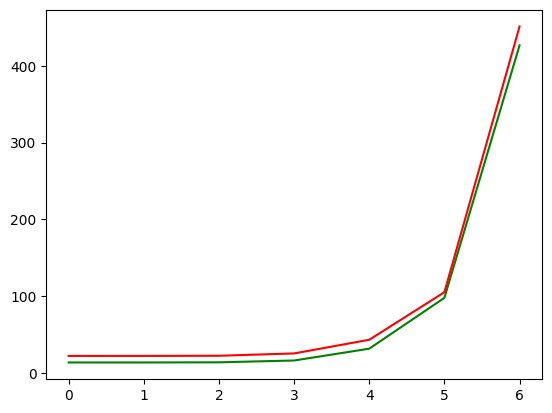

In [ ]:
train_scores, test_scores = [], []
reg_regr = MultipleRegressionReg()
for l in np.logspace(-5, 10, 15):
    steps, errors = reg_regr.fit(x_train, y_train, intercept = True, alpha = 0.01, epsylon = 0.00001, max_steps = 5000, reg = "ElasticNet", lam = l, rho = 0.5)
    x_i = x_train.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    train_scores.append(reg_regr.MSE(x_i, y_train))
    x_i = x_test.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    test_scores.append(reg_regr.MSE(x_i, y_test))
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r')


C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2869284285.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216

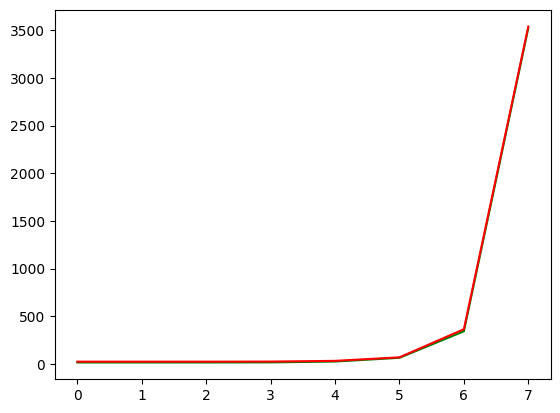

In [ ]:
train_scores, test_scores = [], []
reg_regr = MultipleRegressionReg()
for l in np.logspace(-5, 10, 15):
    steps, errors = reg_regr.fit(x_train, y_train, intercept = True, alpha = 0.01, epsylon = 0.00001, max_steps = 5000, reg = "ElasticNet", lam = l, rho = 0.95)
    x_i = x_train.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    train_scores.append(reg_regr.MSE(x_i, y_train))
    x_i = x_test.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    test_scores.append(reg_regr.MSE(x_i, y_test))
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r')


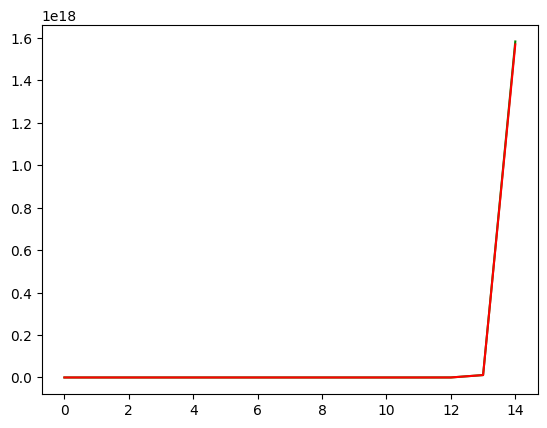

In [ ]:
train_scores, test_scores = [], []
reg_regr = MultipleRegressionReg()
for l in np.logspace(-5, 10, 15):
    steps, errors = reg_regr.fit(x_train, y_train, intercept = True, alpha = 0.01, epsylon = 0.00001, max_steps = 5000, reg = "L1", lam = l)
    x_i = x_train.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    train_scores.append(reg_regr.MSE(x_i, y_train))
    x_i = x_test.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    test_scores.append(reg_regr.MSE(x_i, y_test))
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r')

C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2977700618.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2977700618.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2977700618.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216\2977700618.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_2216

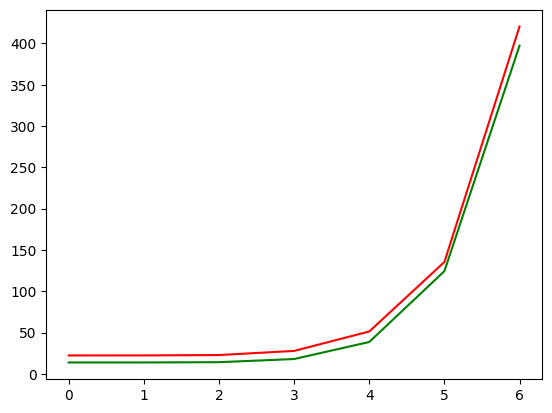

In [ ]:
train_scores, test_scores = [], []
reg_regr = MultipleRegressionReg()
for l in np.logspace(-5, 10, 15):
    steps, errors = reg_regr.fit(x_train, y_train, intercept = True, alpha = 0.01, epsylon = 0.00001, max_steps = 5000, reg = "L2", lam = l)
    x_i = x_train.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    train_scores.append(reg_regr.MSE(x_i, y_train))
    x_i = x_test.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    test_scores.append(reg_regr.MSE(x_i, y_test))
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r')


\begin{align}
   (X^TX + \lambda I_d) w &= X^Ty    \\
   w &= (X^TX + \lambda I_d)^{-1}X^Ty
   \end{align}

In [ ]:
train_scores, test_scores = [], []

for l in np.logspace(-5, 10, 15):
    x_i = x_train.copy().to_numpy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    id = np.eye(x_i.shape[1])
    w = np.linalg.inv(x_i.T @ x_i + l*id) @ x_i.T @ y_train
    MSE_train = (y_train - x_i @ A).T @ (y_train - x_i @ A)/ x_i.shape[0]
    train_scores.append(MSE_train)
    x_i = x_test.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True)
    MSE_train = (y_test - x_i @ A).T @ (y_test - x_i @ A)/ x_i.shape[0]
    test_scores.append(MSE_test)
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r')


AttributeError: 'numpy.ndarray' object has no attribute 'insert'